機械学習特論 第7回 次元削減

In [1]:
# google colab で実行する場合は、次の行の先頭の # を削除してこのブロックを実行する
#!pip install japanize-matplotlib
# umap のインストール
#!pip install umap-learn

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

In [14]:
# sklearnデータセットに収録されたiris(アヤメ)のデータセットをロードしてデータを準備
from sklearn.datasets import load_iris
iris_data = load_iris()
# iris_x = pd.DataFrame(iris_data["data"],columns=iris_data["feature_names"])
iris_x = iris_data["data"]
# iris_y = pd.DataFrame(iris_data["target"],columns=["target"])
iris_y = iris_data["target"]

In [15]:
# 主成分分析 (PCA)
pca = PCA(n_components=2, random_state=0)
iris_x_pca = pca.fit_transform(iris_x)
# t-SNE
tsne = TSNE(n_components=2, random_state=0)
iris_x_tsne = tsne.fit_transform(iris_x)
# UMAP
umap_model = umap.UMAP(n_components=2, random_state=0)
iris_x_umap = umap_model.fit_transform(iris_x)

e:\sudspg\su_dspg_ds\venv\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
e:\sudspg\su_dspg_ds\venv\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


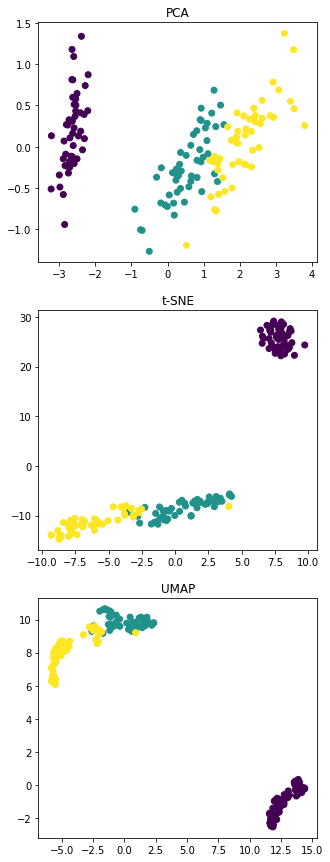

In [23]:
# 次元削減結果の表示
fig, ax = plt.subplots(3, 1, figsize=(5,15))
ax[0].scatter(iris_x_pca[:, 0], iris_x_pca[:, 1], c=iris_y)
ax[0].set_title("PCA")
ax[1].scatter(iris_x_tsne[:, 0], iris_x_tsne[:, 1], c=iris_y)
ax[1].set_title("t-SNE")
ax[2].scatter(iris_x_umap[:, 0], iris_x_umap[:, 1], c=iris_y)
ax[2].set_title("UMAP")
plt.show()

In [18]:
# 手書き文字のデータセットをダウンロードして、実験用データを準備
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import fetch_openml
mnist_data = fetch_openml('mnist_784', version=1)
mnist_x = np.array(mnist_data['data'].astype(np.float32))[::10] # 計算時間の都合からデータサイズを縮小
mnist_y = np.array(mnist_data['target'].astype(np.int32))[::10] # 70000 -> 7000

In [19]:
# 主成分分析 (PCA)
pca = PCA(n_components=2, random_state=0)
mnist_x_pca = pca.fit_transform(mnist_x)
# t-SNE
tsne = TSNE(n_components=2, random_state=0)
mnist_x_tsne = tsne.fit_transform(mnist_x)
# UMAP
umap_model = umap.UMAP(n_components=2, random_state=0)
mnist_x_umap = umap_model.fit_transform(mnist_x)

e:\sudspg\su_dspg_ds\venv\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
e:\sudspg\su_dspg_ds\venv\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


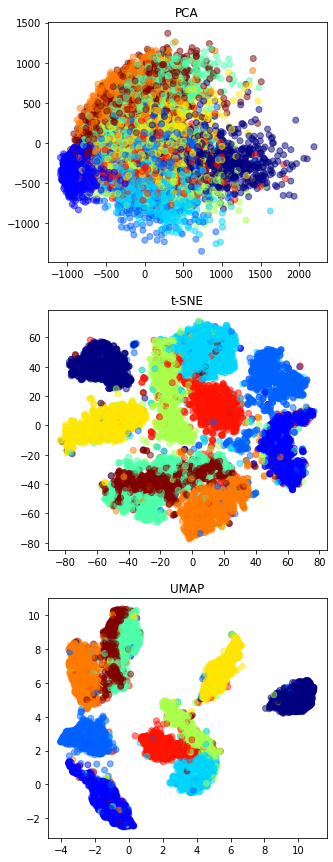

In [24]:
# 次元削減結果の表示
fig, ax = plt.subplots(3, 1, figsize=(5,15))
ax[0].scatter(mnist_x_pca[:, 0], mnist_x_pca[:, 1], c=mnist_y, cmap='jet', alpha=0.5)
ax[0].set_title("PCA")
ax[1].scatter(mnist_x_tsne[:, 0], mnist_x_tsne[:, 1], c=mnist_y, cmap='jet', alpha=0.5)
ax[1].set_title("t-SNE")
ax[2].scatter(mnist_x_umap[:, 0], mnist_x_umap[:, 1], c=mnist_y, cmap='jet', alpha=0.5)
ax[2].set_title("UMAP")
plt.show()